# Diamond prices

### This diamond dataset contains the prices and other attributes of almost 54,000 diamonds. These attributes will be used to predict the prices of diamonds using supervised machine learning algorithms.

### Columns

* **price**: price in US dollars (\\$326--\\$18,823)
* **carat**: weight of the diamond (0.2--5.01)

* **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color**: diamond colour, from J (worst) to D (best)

* **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **x**: length in mm (0--10.74)

* **y**: width in mm (0--58.9)

* **z**: depth in mm (0--31.8)

* **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table**: width of top of diamond relative to widest point (43--95)

The dataset was taken from the Kaggle: https://www.kaggle.com/datasets/shivam2503/diamonds

## Objective

To predict diamond prices using the dataset. The dataset includes features such as carat weight, cut quality, color, clarity, dimensions (length, width, depth), and other relevant attributes. The goal is to apply and compare Linear Regression and other multiple supervised machine learning algorithms, including Ridge Regression, Lasso Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost, to develop a robust predictive model for diamond prices. The objective is to assess the performance of these models and identify the most effective approach for accurately forecasting diamond prices based on their attributes.

### Here's the base plan:
* Read the diamond csv file and create a dataframe for it.
* Cleaning out the rows that have the values of zero in any numerical features. Normalizing numerical features using Standard scaler and one hot encoding the categorical features so that they can be included in analysis.
* EDA: plotting box plots and facet grid of each categorical feature vs price and then analyzing them, pairplot of numerical features in order to understand their relations.
* Looking for multicollinearity using correlation heatmap and VIF table.
* Applying Simple Linear Regression algorithm on the dataset, doing some feature engineering and using interactive features and then analyzing the result using ols stats summary and plotting actual vs predicted graph.
* Applying L1 and L2 regularization using Ridge and Lasso Regression.
* Applying rest of the supervised models (Decision Tree, Random Forest, Gradient Boosting and XGBoost) and then comparing R2 and RMSE values.



In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Github Link: https://github.com/milanPatel001/SL-Diamonds

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [114]:
diamond_df = pd.read_csv('./data/diamonds.csv')
diamond_df.info()

categorical_features = ["cut", "color", "clarity"]
numerical_features = ["carat", "depth", "table", "x", "y", "z"]

# Cleaning all the rows that have value of zero in any column
diamond_df = diamond_df[(diamond_df[numerical_features] != 0).all(axis=1)]
diamond_df2 = diamond_df.copy(deep = True)
diamond_df_set3 = diamond_df2.copy(deep = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [115]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [116]:
# One hot encoding
diamond_df_vis = pd.get_dummies(diamond_df2, columns=categorical_features, dtype=int, drop_first=True)

In [117]:
diamond_df_vis

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


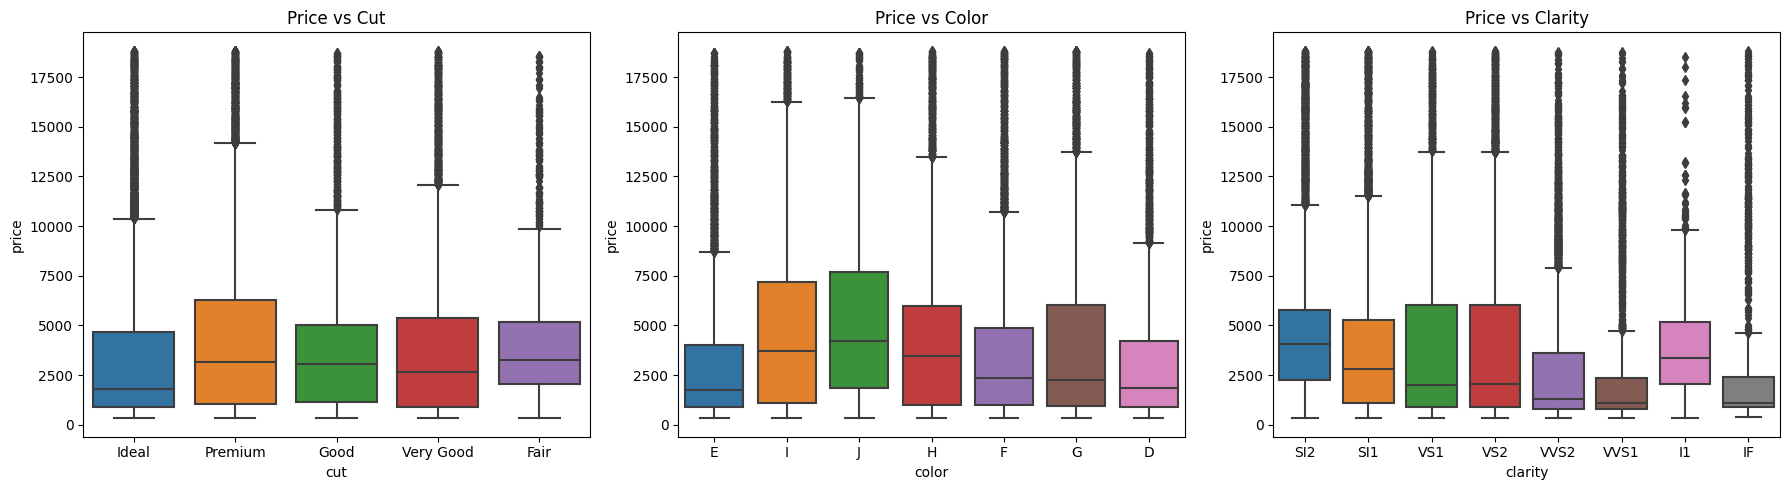

In [118]:
import seaborn as sns

plt.figure(figsize=(18, 5))

# Boxplot for Cut
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=diamond_df)
plt.title('Price vs Cut')

# Boxplot for Color
plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=diamond_df)
plt.title('Price vs Color')

# Boxplot for Clarity
plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=diamond_df)
plt.title('Price vs Clarity')

plt.tight_layout()
plt.show()

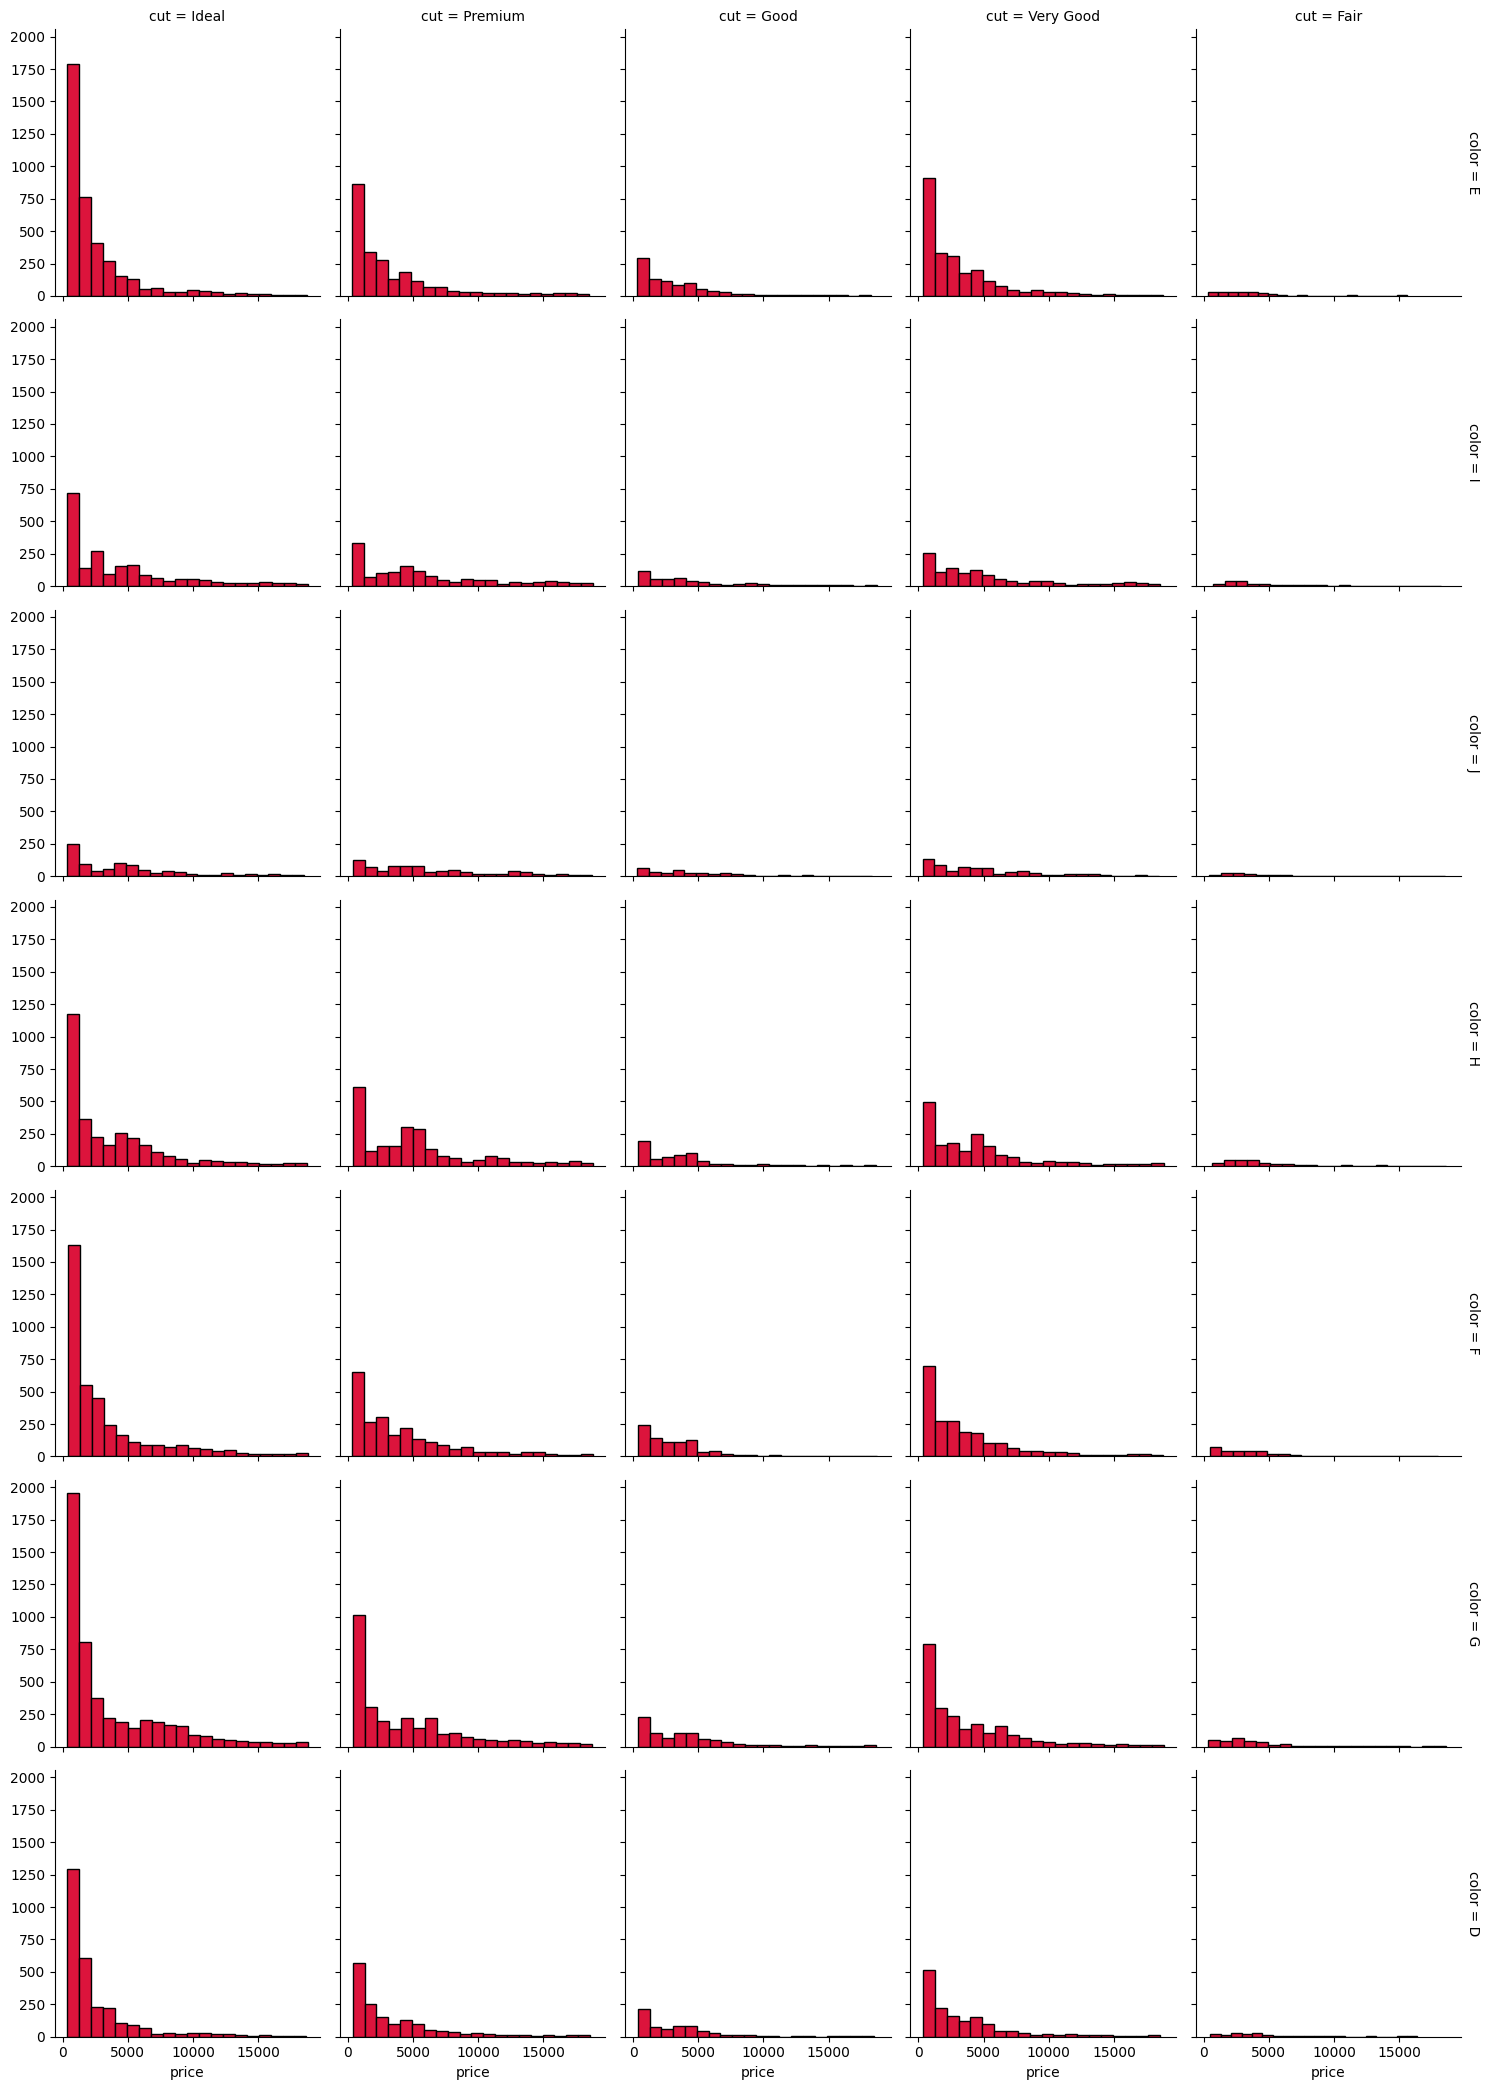

In [119]:
g = sns.FacetGrid(diamond_df, col='cut', row='color', margin_titles=True)
g.map(plt.hist, 'price', bins=20, color='crimson', edgecolor='black')
plt.show()

## 1. Price vs Cut
#### Observation:
The Premium cut tends to have higher median prices compared to other cuts.
The Fair cut shows the lowest median price.

#### Inference:
Diamonds with a Premium cut generally command higher prices, possibly due to better perceived quality or craftsmanship.
Ideal and Very Good cuts also maintain relatively high prices, though not as high as Premium.
The Fair cut may be less desirable, leading to lower prices.

## 2. Price vs Color
#### Observation:
The I and J colors have the highest median prices, while D and E colors have lower median prices.

#### Inference:
Contrary to what might be expected (where lower color grades like D might command higher prices due to being more colorless), the plot suggests that diamonds with I and J colors are commanding higher prices. This could be due to a combination of factors, such as demand, availability, or other features (like cut and clarity) being stronger in those diamonds.

## 3. Price vs Clarity
#### Observation:
VS1 and VS2 clarity levels have higher median prices compared to other clarity grades.
IF (Internally Flawless) has a relatively lower median price than expected, considering its high clarity.

#### Inference:
Diamonds with VS1 and VS2 clarity levels are likely striking a balance between quality and cost, making them popular and thus more expensive.
The lower price for IF diamonds could indicate that other factors (like cut or carat) may play a more significant role in determining price, or it could be that the market does not value the step-up from VVS1 and VVS2 to IF as highly in terms of price.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

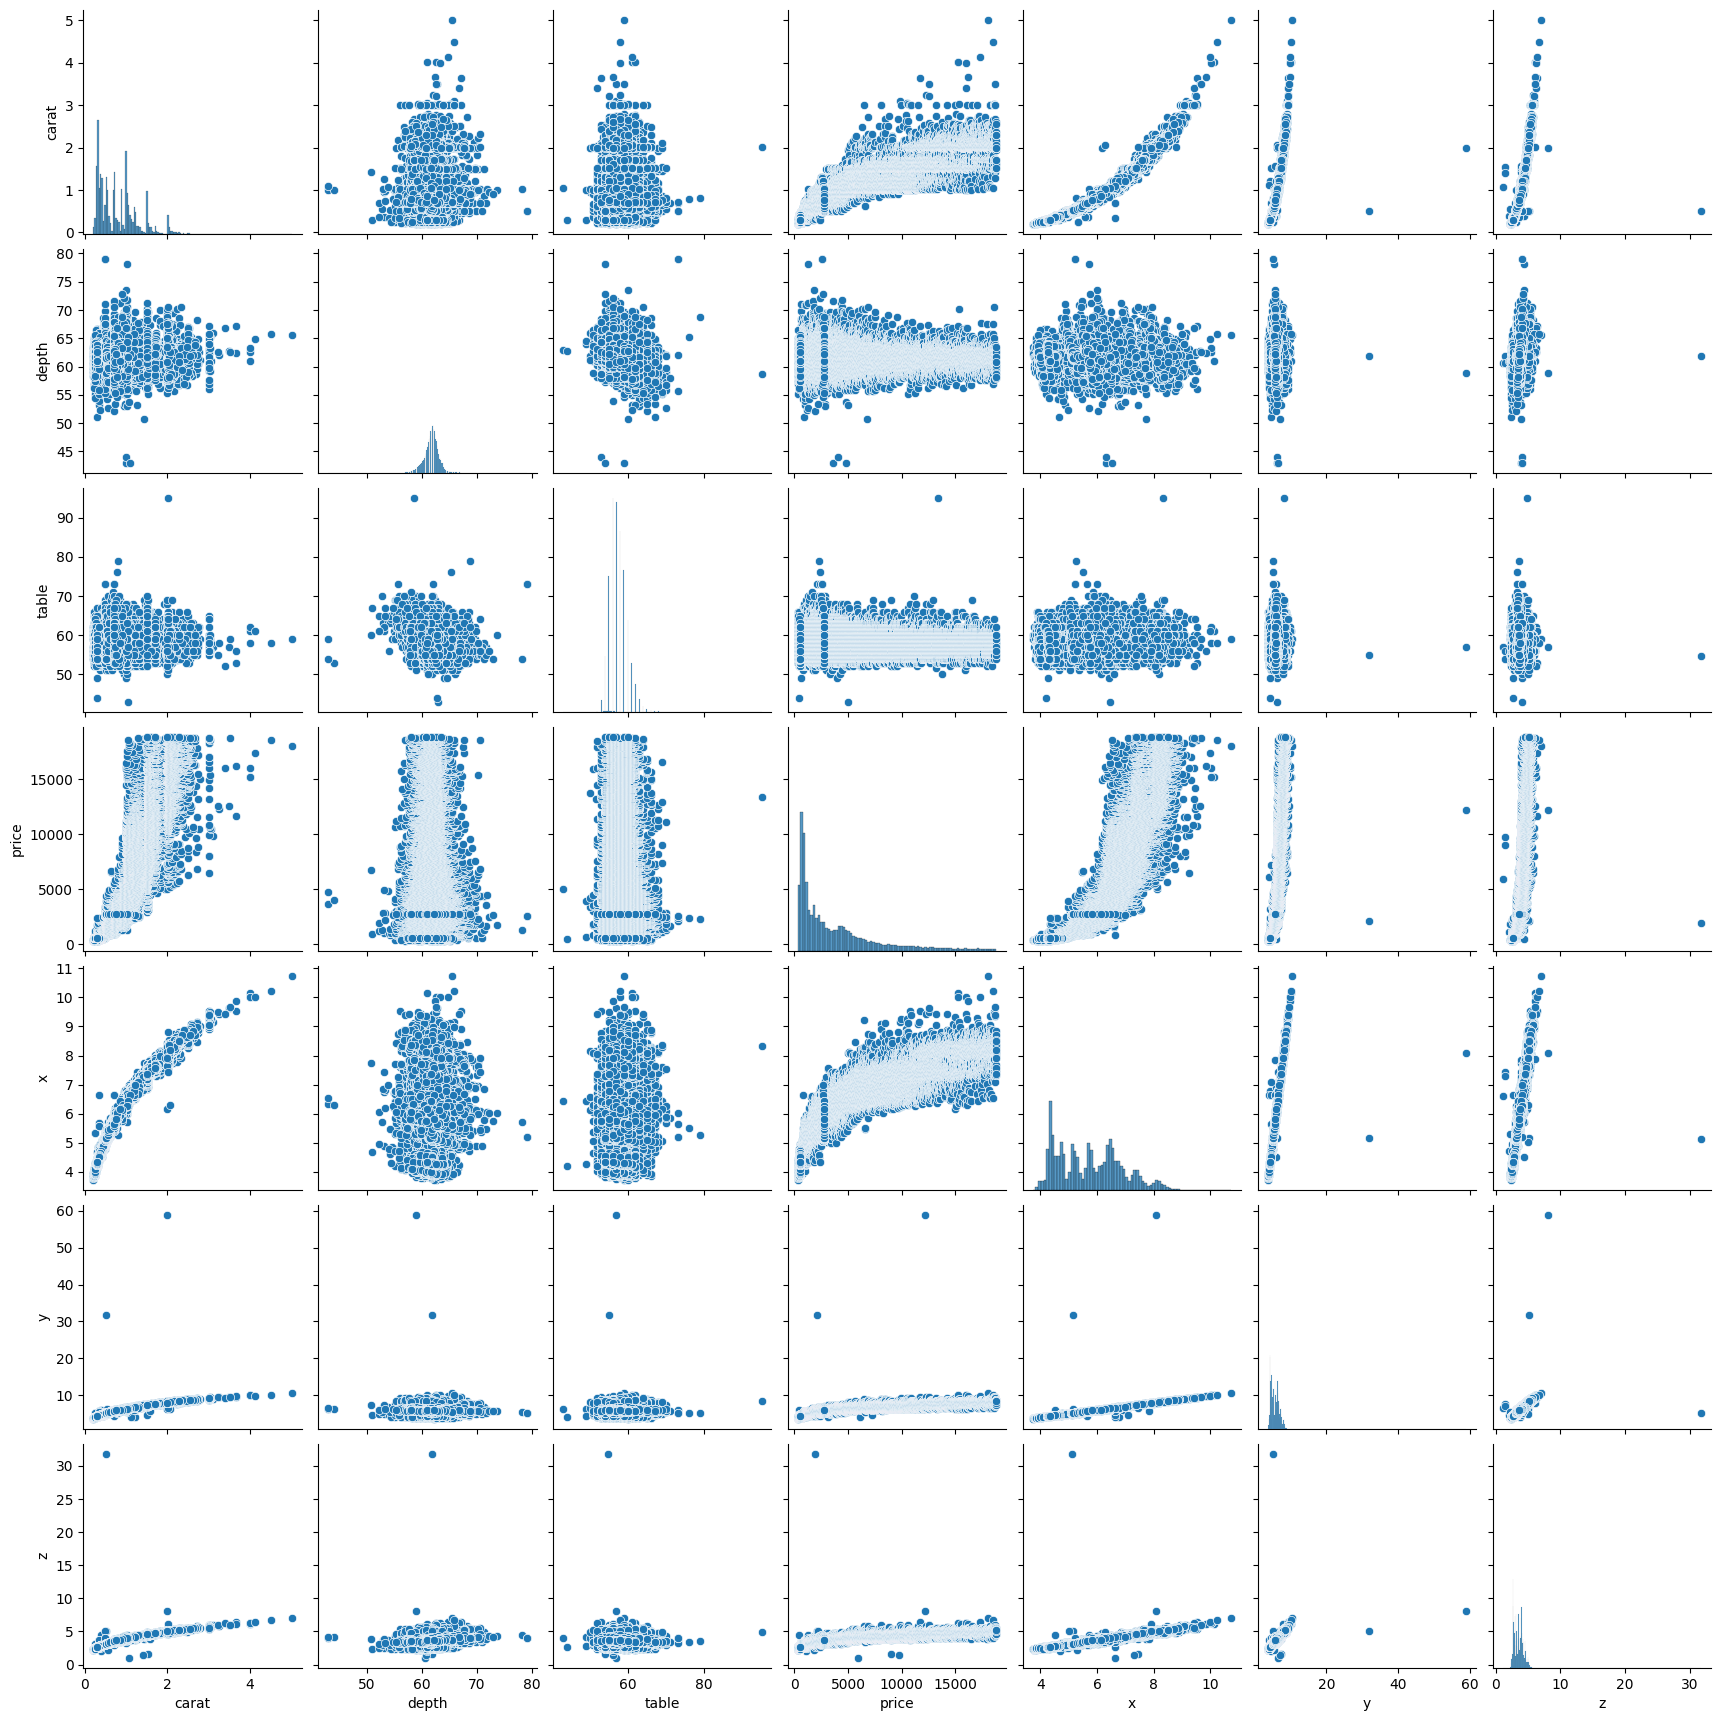

In [120]:
sns.pairplot(diamond_df)

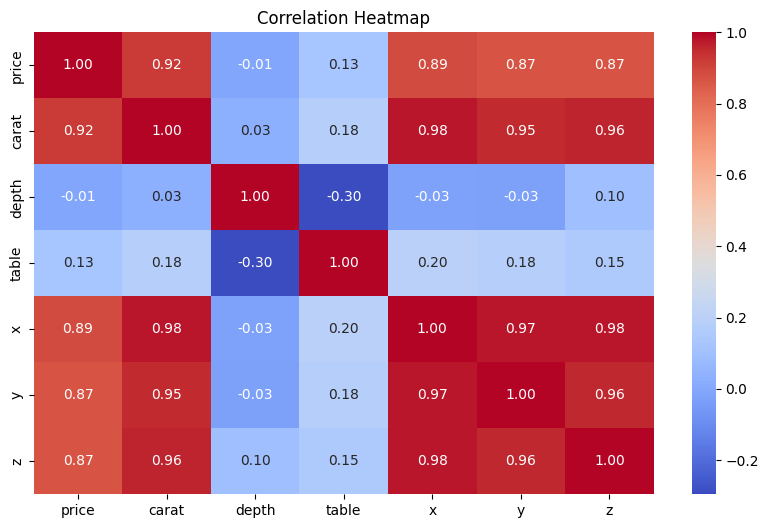

In [121]:
plt.figure(figsize=(10, 6))
sns.heatmap(diamond_df[["price","carat", "depth", "table", "x", "y", "z"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### * Carat is a key feature that strongly influences both the price and the dimensions (x, y, z) of the diamond.

#### * Depth and Table have relatively weak relationships with other features, indicating they may not have a straightforward impact on price or other dimensions.
 
#### * The strong correlations among x, y, and z suggest they may be redundant features since they represent the same physical dimensions.

In [122]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = diamond_df_vis
X = sm.add_constant(diamond_df_vis.drop(columns=['price']))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Variable          VIF
0           const  7265.854181
1           carat    25.391630
2           depth     1.873275
3           table     1.787821
4               x    65.109687
5               y    20.859591
6               z    29.986743
7        cut_Good     3.941991
8       cut_Ideal    11.315818
9     cut_Premium     8.351944
10  cut_Very Good     7.638678
11        color_E     2.010003
12        color_F     2.013356
13        color_G     2.193843
14        color_H     1.951132
15        color_I     1.710593
16        color_J     1.423803
17     clarity_IF     3.537884
18    clarity_SI1    14.819307
19    clarity_SI2    11.505744
20    clarity_VS1    10.812378
21    clarity_VS2    14.316699
22   clarity_VVS1     5.951940
23   clarity_VVS2     7.583532


* **High Multicollinearity**: The variables carat, x, y, and z show high VIF values, indicating significant multicollinearity, likely because they all relate to the size of the diamond.

* **Moderate Multicollinearity**: Some categorical variables, such as cut_Ideal, clarity_SI1, and clarity_VS2, have moderately high VIF values, suggesting some level of multicollinearity but not excessively so.

* **Low Multicollinearity**: Most other variables, including depth, table, and other categorical variables, have low VIF values, indicating minimal multicollinearity issues.

In [65]:
# One-hot encode categorical features
ohe = OneHotEncoder()

# Fit the OneHotEncoder on the categorical features
ohe.fit(diamond_df[categorical_features])

# Get the number of categories for each feature
num_categories = {col: len(categories) for col, categories in zip(categorical_features, ohe.categories_)}

# Output the number of one-hot encoded columns for each categorical feature
for feature, num in num_categories.items():
    print(f"The feature '{feature}' has {num} unique categories and will result in {num} one-hot encoded columns.")

The feature 'cut' has 5 unique categories and will result in 5 one-hot encoded columns.
The feature 'color' has 7 unique categories and will result in 7 one-hot encoded columns.
The feature 'clarity' has 8 unique categories and will result in 8 one-hot encoded columns.


In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

def preprocess(x, y, num, cat):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num),
            ('cat', OneHotEncoder(), cat)
        ])
    
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Apply preprocessing
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    return (X_train, y_train, X_test, y_test)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = (mean_squared_error(y_test, y_pred))**0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R-squared: {r2:.2f}')
#     print('-' * 90)

    return y_pred
    

def actualVsPredictedGraph(y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.5, color='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()
    

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.117e+04
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:56:56   Log-Likelihood:            -3.6468e+05
No. Observations:               43136   AIC:                         7.294e+05
Df Residuals:                   43112   BIC:                         7.296e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1875.8296    

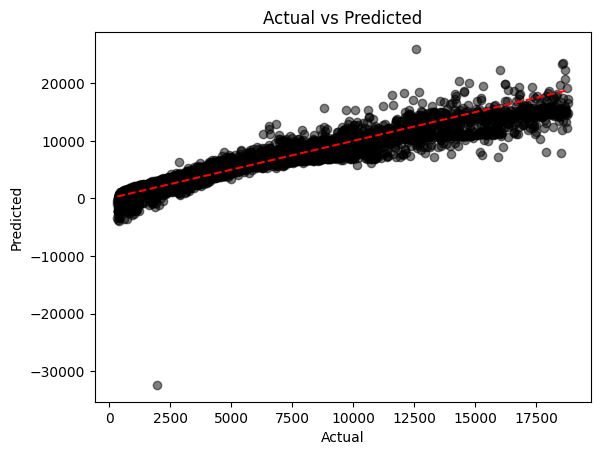

In [101]:
train_df, test_df = train_test_split(diamond_df, test_size=0.2, random_state=42)

model_train = ols('price ~ carat + depth + table + x + y + z + C(cut) + C(color) + C(clarity)', data=train_df).fit()

print(model_train.summary())

# Make predictions on the test data
y_test_pred = model_train.predict(test_df)

actualVsPredictedGraph(test_df['price'], y_test_pred)

#### We got Adj. R-squared value of 0.919, which is suggesting a strong fit of the model to the data. let's try to do some feature engineering on this model.                 

## Feature Engineering

#### As we noticed earlier in the correlation heatmap and VIF table that x,y and z are highly correlated. Why not convert them into a single field called 'volume' where volume = x * y * z.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.204e+04
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:57:00   Log-Likelihood:            -3.6568e+05
No. Observations:               43136   AIC:                         7.314e+05
Df Residuals:                   43114   BIC:                         7.316e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5101.9000    

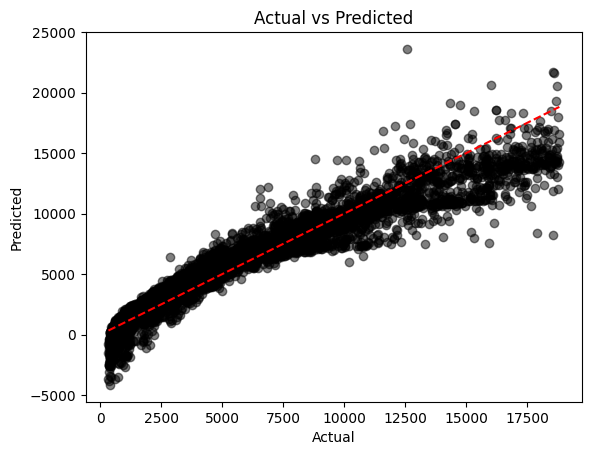

In [102]:
diamond_df2['volume'] = diamond_df2['x'] * diamond_df2['y'] * diamond_df2['z'] 

diamond_df2 = diamond_df2.drop(["x", "y", "z"], axis=1)

train_df, test_df = train_test_split(diamond_df2, test_size=0.2, random_state=42)

model_train = ols('price ~ carat + depth + table + volume + C(cut) + C(color) + C(clarity)', data=train_df).fit()

print(model_train.summary())

# Make predictions on the test data
y_test_pred = model_train.predict(test_df)

actualVsPredictedGraph(test_df['price'], y_test_pred)

### Now, let's try to use interactive features

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.930e+04
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:57:03   Log-Likelihood:            -3.6486e+05
No. Observations:               43136   AIC:                         7.298e+05
Df Residuals:                   43110   BIC:                         7.300e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -2.46e+04    

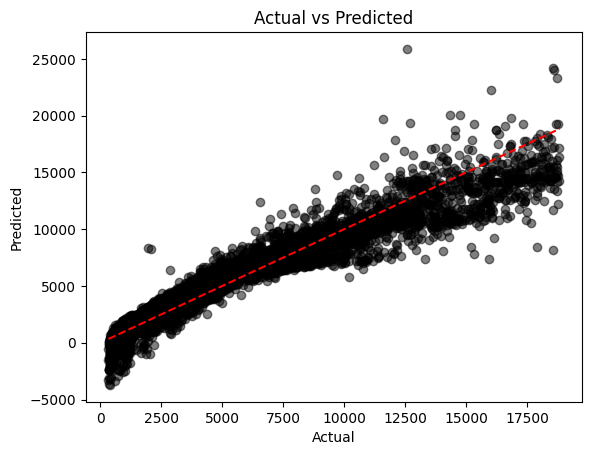

In [103]:
interactive_features = "carat + depth + table + volume + carat*depth + carat*volume  + depth*volume + table*volume"
formula = f'price ~ {interactive_features} + C(cut) + C(color) + C(clarity)'

# Fit the model
model = ols(formula, data=train_df).fit()

# Print the summary
print(model.summary())

y_test_pred = model.predict(test_df)

actualVsPredictedGraph(test_df['price'], y_test_pred)

* #### All three LR models perform well in predicting diamond prices, with slight variations in the variables included and their effects. They have very similar R-squared values 0.919, 0.915, and 0.918 respectively.

* #### carat, cut, color, and clarity are highly significant predictors of price (p-values < 0.05).

* #### carat has the largest positive coefficient, indicating it's the most influential factor in determining price.

* #### Categorical variables show consistent patterns across models, with better grades generally associated with higher prices.

### Let's try to do l1 and l2 regularization on linear regression using Lasso and Ridge Regression.

Ridge Regression

MAE: 726.27
RMSE: 1135.45
R-squared: 0.92


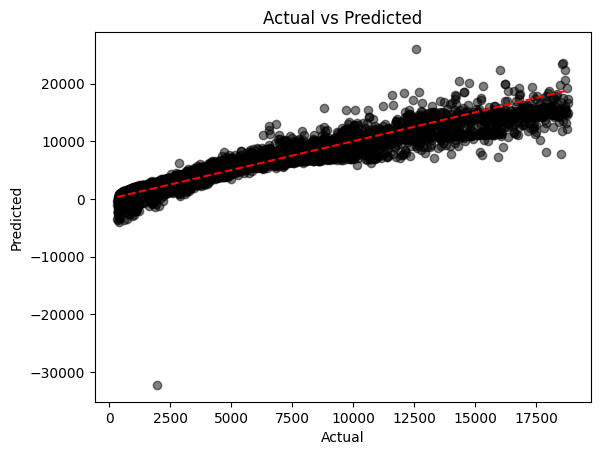

In [104]:
y = diamond_df_set3['price']
x = diamond_df_set3.drop('price' ,axis=1)

X_train, y_train, X_test, y_test = preprocess(x, y, numerical_features, categorical_features)

print("Ridge Regression\n")
model = Ridge(alpha=1.0)
y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

actualVsPredictedGraph(y_test, y_pred)

Lasso Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+09, tolerance: 6.843e+07
  model = cd_fast.enet_coordinate_descent(


MAE: 726.01
RMSE: 1132.30
R-squared: 0.92


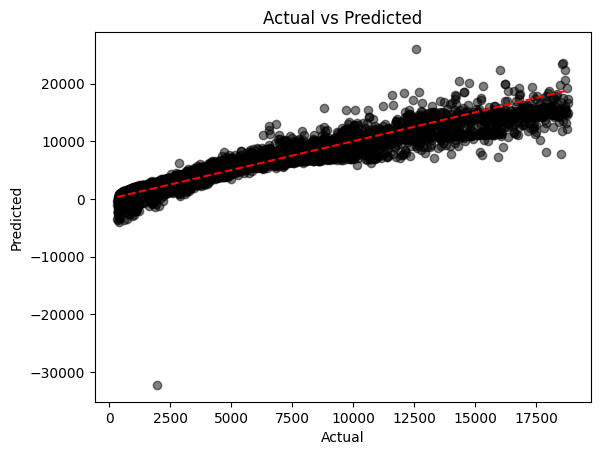

In [105]:
print("Lasso Regression")
model = Lasso(alpha=0.1)
evaluate_model(model, X_train, y_train, X_test, y_test)
actualVsPredictedGraph(y_test, y_pred)

#### The fact that Ridge, Lasso, and Simple Linear Regression all yield an R-squared of 0.92 suggests that the added complexity of regularization (penalizing coefficients) does not significantly improve the model’s ability to explain variance in the data. The linear relationships between the features and the target (price) are being captured well by Simple Linear Regression alone.

### Let's try with different models as well: 

Decision Tree Regressor
MAE: 354.97
RMSE: 734.30
R-squared: 0.97


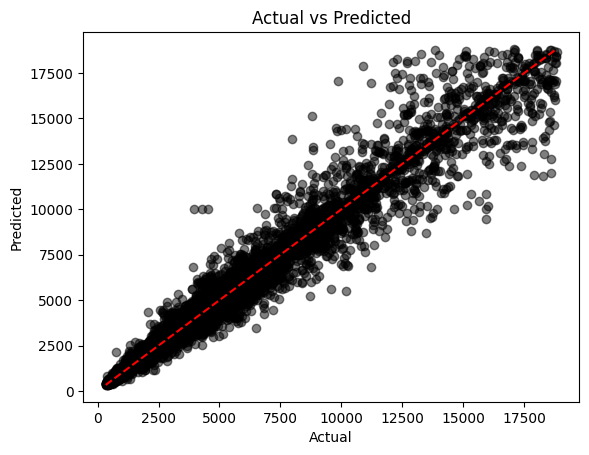

In [106]:
print("Decision Tree Regressor")
model = DecisionTreeRegressor(random_state=42)
y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
actualVsPredictedGraph(y_test, y_pred)

Random Forest Regressor
MAE: 264.59
RMSE: 523.72
R-squared: 0.98


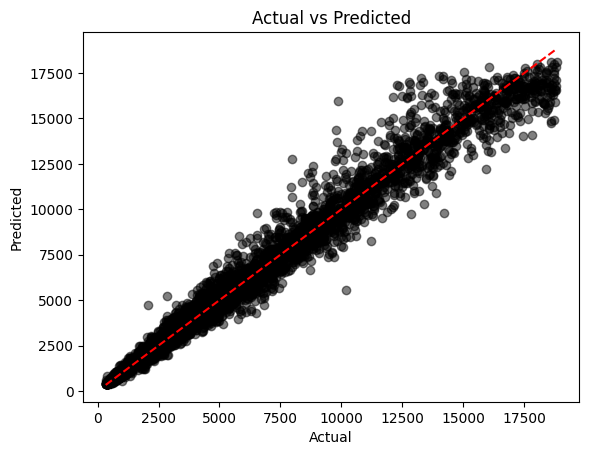

In [107]:
print("Random Forest Regressor")
model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
actualVsPredictedGraph(y_test, y_pred)

Gradient Boosting Regressor
MAE: 401.38
RMSE: 726.24
R-squared: 0.97


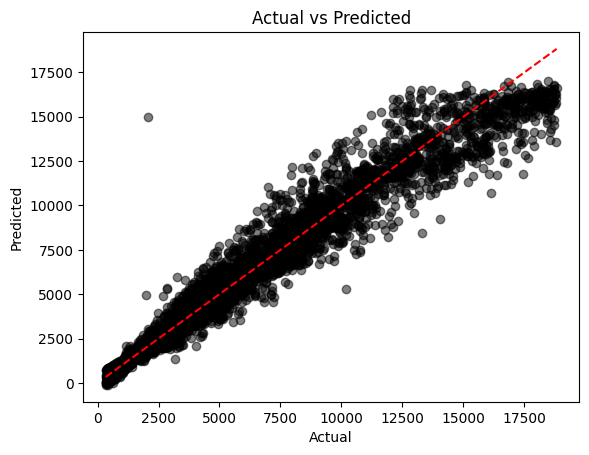

In [109]:
print("Gradient Boosting Regressor")
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
actualVsPredictedGraph(y_test, y_pred)

XGBoost Regressor
MAE: 287.62
RMSE: 550.29
R-squared: 0.98


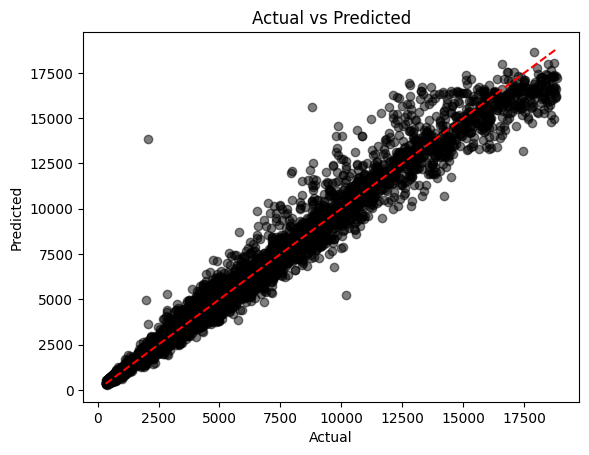

In [110]:
print("XGBoost Regressor")
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
actualVsPredictedGraph(y_test, y_pred)

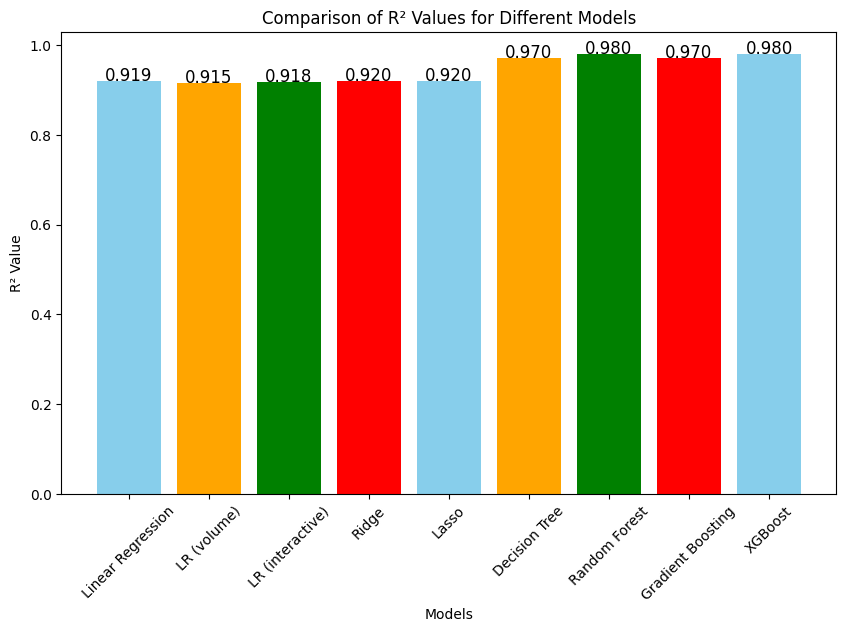

In [111]:
models = ['Linear Regression', 'LR (volume)', 'LR (interactive)', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest' ,'Gradient Boosting' ,'XGBoost']
r2_values = [0.919, 0.915, 0.918, 0.92, 0.92, 0.97, 0.98, 0.97, 0.98]  

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['skyblue', 'orange', 'green', 'red'])

# Adding title and labels
plt.title('Comparison of R² Values for Different Models')
plt.xlabel('Models')
plt.ylabel('R² Value')

plt.xticks(rotation=45) 

# Display the R² value on top of each bar
for i in range(len(r2_values)):
    plt.text(i, r2_values[i] + 0.001, f'{r2_values[i]:.3f}', ha='center', fontsize=12)

# Show the plot
plt.show()

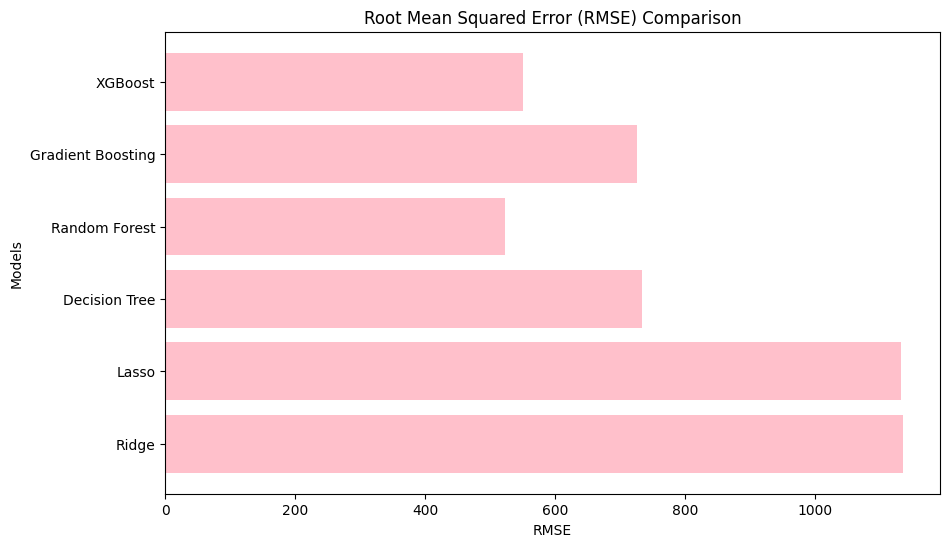

In [112]:
models = ['Ridge', 'Lasso', 'Decision Tree', 'Random Forest' ,'Gradient Boosting' ,'XGBoost']

rmse_values = [1135.45, 1132.30, 734.30, 523.72, 726.24, 550.29]

plt.figure(figsize=(10, 6))
plt.barh(models, rmse_values, color='pink')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.show()

# Models summary

* #### Every Model performed quite well on this dataset. This might be due to a less complex dataset.

* #### Random Forest Regressor and XGBoost Regressor are the best models in terms of both accuracy (lower MAE and RMSE) and goodness-of-fit (R-squared).

* #### Decision Tree performs well but is outperformed by ensemble methods like Random Forest and XGBoost.

* #### Simple LR, Ridge and Lasso perform similarly but are less accurate compared to the tree-based models

# Conclusion and Takeaways

#### I experimented with several variations of linear regression models: the standard Linear Regression, Linear Regression with Feature Engineering (calculated as volume=x×y×z), and Linear Regression with interaction terms. Linear models are useful when dealing with data that is linear in nature or when interpretability is crucial. However, for more complex datasets, non-linear models might be more appropriate.

#### While these approaches provided insights into the relationships within the data, they were ultimately outperformed by more sophisticated models like Random Forest and XGBoost. This highlights the importance of exploring both feature engineering and non-linear models to fully capture the complexity of the dataset.